In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as rick
%matplotlib widget
from ipywidgets import *
from matplotlib.widgets import Slider, Button
from matplotlib.animation import FuncAnimation

def t_max(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 + (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def t_min(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 - (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

alpha = 1 / 132.184
m_W = 80.379
m_Z = 91.1876
m_e = 0.511E-3
m_m = 105.66E-3
m_h = 125.1

m = m_m
E_phot_min = 5 #GeV
s_min_fix = 4 * m ** 2 
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
t_min_fix = t_min(s_max_fix, m)
t_max_fix = (m_h - m) ** 2

e = (4 * np.pi * alpha) ** 0.5
cos = m_W / m_Z
sin = np.sqrt(1 - cos ** 2)
v = 2 * m_W * sin / e
Gam_Z = 2.4952
C_eB = 10 ** -10
C_eW = C_eB
C_eH = 10 ** -10
C_HB = 2 * 10 ** -10
C_HW = 10 ** -10
#Pick C_HD and C_HWB s.t. we can use the SM vev
C_HD = 10 ** -10
C_HWB = C_HD
C_AA = cos ** 2 * C_HB + sin ** 2 * C_HW - sin * cos * C_HWB
C_AZ = 2 * sin * cos * (C_HW - C_HB) - (cos ** 2 - sin ** 2) * C_HWB
v_alt = v / (1 + v ** 2 * (cos / sin) * (C_HWB + (cos / (4 * sin)) * C_HD))
m = m_m
bins = 100

def scale(l, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW):
    v_alt = v / (1 + v ** 2 * (cos / sin) * ((m / (v * 10 ** 6)) * i_HWB + (cos / (4 * sin)) * C_HD))
    init = (m / (v * 10 ** 6)) * np.array([cos ** 2 * i_HB + sin ** 2 * i_HW - sin * cos * i_HWB, 2 * sin * cos * (i_HB - i_HW) - (cos ** 2 - sin ** 2) * i_HWB, i_eH, i_eB, i_eW])
    I = []
    SM4 = l[0] * (v / v_alt) ** 2
    AA6 = (init[0] / C_AA) * l[1] * (v / v_alt) ** 2
    AZ6 = (init[1] / C_AZ) * l[2] * (v / v_alt) ** 2
    eH6 = (init[2] / C_eH) * l[3] * (v / v_alt)
    eBeW6 = ((sin * init[4] - cos * init[3]) / (sin * C_eW - cos * C_eB)) * l[4] * (v / v_alt) ** 2
    AA8 = (init[0] ** 2 / C_AA ** 2) * l[5]
    AZ8 = (init[1] ** 2 / C_AZ ** 2) * l[6]
    eH8 = (init[2] ** 2 / C_eH ** 2) * l[7] * (v_alt / v) ** 2
    AAAZ8 = ((init[0] * init[1]) / (C_AA * C_AZ)) * l[8]
    eBeWo8 = ((init[2] * (sin * init[4] - cos * init[3])) / (C_eH * (sin * C_eW - cos * C_eB))) * l[10] * (v_alt / v)
    eBeW8 = ((sin * init[4] - cos * init[3]) ** 2 / (sin * C_eW - cos * C_eB) ** 2) * l[9]
    I.append(SM4)
    I.append(AA6)
    I.append(AZ6)
    I.append(eH6)
    I.append(eBeW6)
    I.append(AA8)
    I.append(AZ8)
    I.append(eH8)
    I.append(AAAZ8)
    I.append(eBeWo8)
    I.append(eBeW8)
    return I

def scale_anim(l, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs):
    I = []
    for i in range(0, len(C_HBs)):
        C_AA_i = cos ** 2 * C_HBs[i] + sin ** 2 * C_HWs[i] - sin * cos * C_HWBs[i]
        C_AZ_i = 2 * sin * cos * (C_HWs[i] - C_HBs[i]) - (cos ** 2 - sin ** 2) * C_HWBs[i]
        
        SM = l[0] * (v / (v / (1 + v ** 2 * (cos / sin) * ((C_HWBs[i]) + (cos / (4 * sin)) * C_HD)))) ** 2
        AA6 = (C_AA_i / C_AA) * l[1]
        AZ6 = (C_AZ_i / C_AZ) * l[2]
        eH6 = (C_eHs[i] / C_eH) * l[3]
        eBeW6 = ((sin * C_eWs[i] - cos * C_eBs[i]) / (sin * C_eW - cos * C_eB)) * l[4] 
        AA8 = (C_AA_i ** 2 / C_AA ** 2) * l[5]
        AZ8 = (C_AZ_i ** 2 / C_AZ ** 2) * l[6]
        eH8 = (C_eHs[i] ** 2 / C_eH ** 2) * l[7]
        AAAZ8 = ((C_AA_i * C_AZ_i) / (C_AA * C_AZ)) * l[8]
        eBeWo8 = ((C_eHs[i] * (sin * C_eWs[i] - cos * C_eBs[i])) / (C_eH * (sin * C_eW - cos * C_eB))) * l[10]
        eBeW8 = ((sin * C_eWs[i] - cos * C_eBs[i]) ** 2 / (sin * C_eW - cos * C_eB) ** 2) * l[9]
        I.append(np.concatenate((SM, AA6, AZ6, eH6, eBeW6, AA8, AZ8, eH8, AAAZ8, eBeW8, eBeWo8), axis = 0))
    return np.array(I)

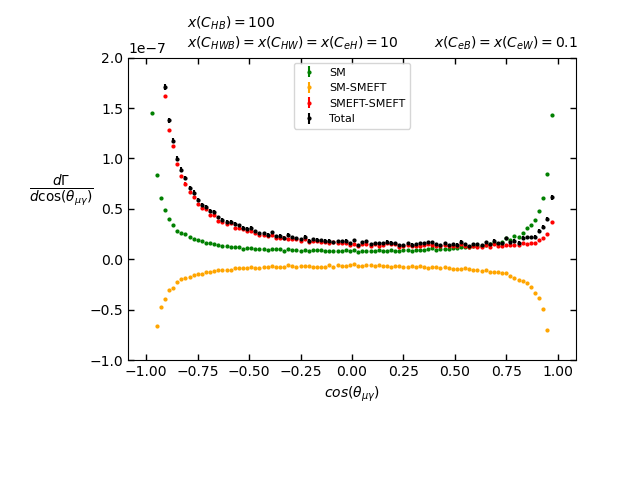

In [39]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.2, bottom=0.25)

num = 50

C_HBs = np.linspace(0, 100, num) * (m_m / (v * 10 ** 6))
C_HWs = np.linspace(0, 10, num) * (m_m / (v * 10 ** 6))
C_HWBs = C_HWs
C_eHs = C_HWs
C_eBs = np.ones(num) * 0.1 * (m_m / (v * 10 ** 6))
C_eWs = C_eBs

norm = 2 / bins
keV = 1
cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]
    
I_cos4_1 = np.array(rick.load(open('I_cos4_1mas_sep1', 'rb')))
I_cos6_1 = np.array(rick.load(open('I_cos6_1mas_sep1', 'rb')))
I_cos6_2 = np.array(rick.load(open('I_cos6_2mas_sep1', 'rb')))
I_cos6_3 = np.array(rick.load(open('I_cos6_3mas_sep1', 'rb')))
I_cos6_4 = np.array(rick.load(open('I_cos6_4mas_sep1', 'rb')))
I_cos8_5 = np.array(rick.load(open('I_cos8_5mas_sep1', 'rb')))
I_cos8_6 = np.array(rick.load(open('I_cos8_6mas_sep1', 'rb')))
I_cos8_7 = np.array(rick.load(open('I_cos8_7mas_sep1', 'rb')))
I_cos8_8 = np.array(rick.load(open('I_cos8_8mas_sep1', 'rb')))
I_cos8_9 = np.array(rick.load(open('I_cos8_9mas_sep1', 'rb')))
I_cos8_10 = np.array(rick.load(open('I_cos8_10mas_sep1', 'rb')))
mas_ls = [I_cos4_1, I_cos6_1, I_cos6_2, I_cos6_3, I_cos6_4, I_cos8_5, I_cos8_6, I_cos8_7, I_cos8_8, I_cos8_9, I_cos8_10]

def cos_anim(l, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs):
    k = 1 / norm
    return k * scale_anim(l, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)

def cos_4sum_init(i):
    cos_4sum = 0
    cos_4errsum = 0
    for j in range(0, 1):
        cos_4sum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j]
        cos_4errsum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j + 1]
    return np.array([cos_4sum, cos_4errsum])

def cos_6sum_init(i):
    cos_6sum = 0
    cos_6errsum = 0
    for j in range(1, 5):
        cos_6sum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j]
        cos_6errsum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j + 1]
    return np.array([cos_6sum, cos_6errsum])

def cos_8sum_init(i):
    cos_8sum = 0
    cos_8errsum = 0
    for j in range(5, 11):
        cos_8sum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j]
        cos_8errsum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j + 1]
    return np.array([cos_8sum, cos_8errsum])

def animate(i):
    ax.clear()
    plt.ylim(-1*10**-7, 2*10**-7)
    #plt.yscale('log')
    ax.errorbar(cos_s, cos_4sum_init(i)[0],  color = 'green', label = 'SM', yerr = cos_4sum_init(i)[1], ls = 'none', markersize = 4, marker = '.')
    ax.errorbar(cos_s, cos_6sum_init(i)[0],  color = 'orange', label = 'SM-SMEFT', yerr = cos_6sum_init(i)[1], ls = 'none', markersize = 4, marker = '.')
    ax.errorbar(cos_s, cos_8sum_init(i)[0],  color = 'red', label = 'SMEFT-SMEFT', yerr = cos_8sum_init(i)[1], ls = 'none', markersize = 4, marker = '.')
    ax.tick_params(direction='in', length=4, width=1)
    ax.errorbar(cos_s, cos_4sum_init(i)[0]+cos_6sum_init(i)[0]+cos_8sum_init(i)[0],  color = 'black', label = 'Total', yerr = cos_4sum_init(i)[1]+cos_6sum_init(i)[1]+cos_8sum_init(i)[1], ls = 'none', markersize = 4, marker = '.')
    ax.text(-0.8, 2.1*10**-7, r'$x(C_{HWB})=x(C_{HW})=x(C_{eH})=$' +str(round(C_HWBs[i] * ((v * 10 ** 6) / m_m)))+'', fontsize = 10)
    ax.text(-0.8, 2.3*10**-7, r'$x(C_{HB})=$' +str(round(C_HBs[i] * ((v * 10 ** 6) / m_m)))+'', fontsize = 10)
    ax.text(0.4, 2.1*10**-7, r'$x(C_{eB})=x(C_{eW})=$' +str(round(C_eBs[i] * ((v * 10 ** 6) / m_m),2))+'', fontsize = 10)
    plt.ylabel(r'$\frac{d\Gamma}{d\cos(\theta_{\mu\gamma})}$', rotation = '0', fontsize = 14)
    ax.yaxis.set_label_coords(-0.15, 0.5)
    plt.xlabel(r'$cos(\theta_{\mu\gamma})$')
    plt.legend(loc='upper center', fontsize = 8)
    
anim = FuncAnimation(fig, animate, interval=200, frames=num, repeat=False)
anim.save('cos_lk.gif', writer='pillow')
plt.show()

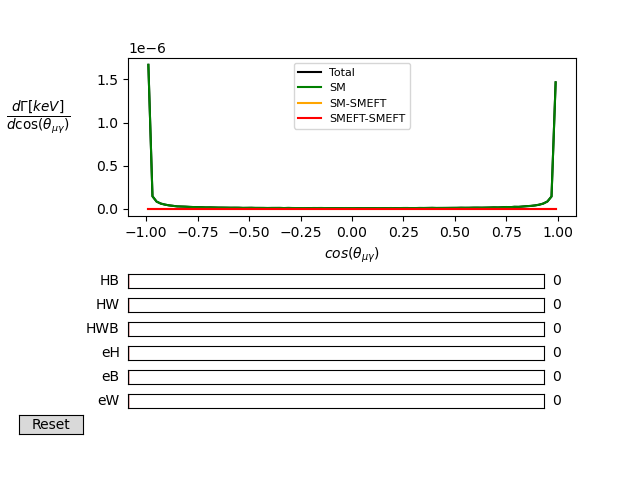

In [2]:
i_HB_init = 0 
i_HW_init = 0
i_HWB_init = 0
i_eH_init = 0
i_eB_init = 0 
i_eW_init = 0
norm = 2 / bins
k = 1 / norm
cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]
    
I_cos4_1 = np.array(rick.load(open('I_cos4_1mas_sep1', 'rb')))
I_cos6_1 = np.array(rick.load(open('I_cos6_1mas_sep1', 'rb')))
I_cos6_2 = np.array(rick.load(open('I_cos6_2mas_sep1', 'rb')))
I_cos6_3 = np.array(rick.load(open('I_cos6_3mas_sep1', 'rb')))
I_cos6_4 = np.array(rick.load(open('I_cos6_4mas_sep1', 'rb')))
I_cos8_5 = np.array(rick.load(open('I_cos8_5mas_sep1', 'rb')))
I_cos8_6 = np.array(rick.load(open('I_cos8_6mas_sep1', 'rb')))
I_cos8_7 = np.array(rick.load(open('I_cos8_7mas_sep1', 'rb')))
I_cos8_8 = np.array(rick.load(open('I_cos8_8mas_sep1', 'rb')))
I_cos8_9 = np.array(rick.load(open('I_cos8_9mas_sep1', 'rb')))
I_cos8_10 = np.array(rick.load(open('I_cos8_10mas_sep1', 'rb')))
mas_ls = [I_cos4_1, I_cos6_1, I_cos6_2, I_cos6_3, I_cos6_4, I_cos8_5, I_cos8_6, I_cos8_7, I_cos8_8, I_cos8_9, I_cos8_10]

def cos_4sum_init(i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW):
    cos_4sum = 0
    cos_4errsum = 0
    for j in range(0, 1):
        cos_4sum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][0]
        cos_4errsum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][1]
    return k * np.array([cos_4sum, cos_4errsum])

def cos_6sum_init(i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW):
    cos_6sum = 0
    cos_6errsum = 0
    for j in range(1, 5):
        cos_6sum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][0]
        cos_6errsum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][1]
    return k * np.array([cos_6sum, cos_6errsum])

def cos_8sum_init(i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW):
    cos_8sum = 0
    cos_8errsum = 0
    for j in range(5, 11):
        cos_8sum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][0]
        cos_8errsum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][1]
    return k * np.array([cos_8sum, cos_8errsum])

fig, ax = plt.subplots()
#plt.yscale('log')
#plt.ylim(-0.1, 1)
line_sum, = ax.plot(cos_s, cos_4sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0] + cos_6sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0] + cos_8sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0], color = 'black', label = 'Total')
line_4, = ax.plot(cos_s, cos_4sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0], color = 'green', label = 'SM')
line_6, = ax.plot(cos_s, cos_6sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0], color = 'orange', label = 'SM-SMEFT')
line_8, = ax.plot(cos_s, cos_8sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0], color = 'red', label = 'SMEFT-SMEFT')
ax.set_ylabel(r'$\frac{d\Gamma[keV]}{d\cos(\theta_{\mu\gamma})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.2, 0.5)
ax.set_xlabel(r'$cos(\theta_{\mu\gamma})$')
plt.legend(fontsize = 8)

fig.subplots_adjust(left=0.2, bottom=0.55)

axs = fig.add_axes([0.2, 0.4, 0.65, 0.03])
HB_slider = Slider(
    ax=axs,
    label='HB',
    valmin=0,
    valmax=100,
    valinit=i_HB_init,
    color = 'gray')

axs = fig.add_axes([0.2, 0.35, 0.65, 0.03])
HW_slider = Slider(
    ax=axs,
    label='HW',
    valmin=0,
    valmax=100,
    valinit=i_HW_init,
    color = 'gray')

axs = fig.add_axes([0.2, 0.3, 0.65, 0.03])
HWB_slider = Slider(
    ax=axs,
    label='HWB',
    valmin=0,
    valmax=100,
    valinit=i_HWB_init,
    color = 'gray')

axs = fig.add_axes([0.2, 0.25, 0.65, 0.03])
eH_slider = Slider(
    ax=axs,
    label='eH',
    valmin=0,
    valmax=100,
    valinit=i_eH_init,
    color = 'gray')

axs = fig.add_axes([0.2, 0.2, 0.65, 0.03])
eB_slider = Slider(
    ax=axs,
    label='eB',
    valmin=0,
    valmax=1000,
    valinit=i_eB_init,
    color = 'gray')

axs = fig.add_axes([0.2, 0.15, 0.65, 0.03])
eW_slider = Slider(
    ax=axs,
    label='eW',
    valmin=0,
    valmax=100,
    valinit=i_eW_init,
    color = 'gray')

def update(val):
    line_sum.set_ydata(cos_4sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0] + cos_6sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0] + cos_8sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0])
    line_4.set_ydata(cos_4sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0])
    line_6.set_ydata(cos_6sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0])
    line_8.set_ydata(cos_8sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0])
    fig.canvas.draw_idle()

HB_slider.on_changed(update)
HW_slider.on_changed(update)
HWB_slider.on_changed(update)
eH_slider.on_changed(update)
eB_slider.on_changed(update)
eW_slider.on_changed(update)

resetax = fig.add_axes([0.03, 0.095, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    HB_slider.reset()
    HW_slider.reset()
    HWB_slider.reset()
    eH_slider.reset()
    eB_slider.reset()
    eW_slider.reset()
button.on_clicked(reset)

plt.show()

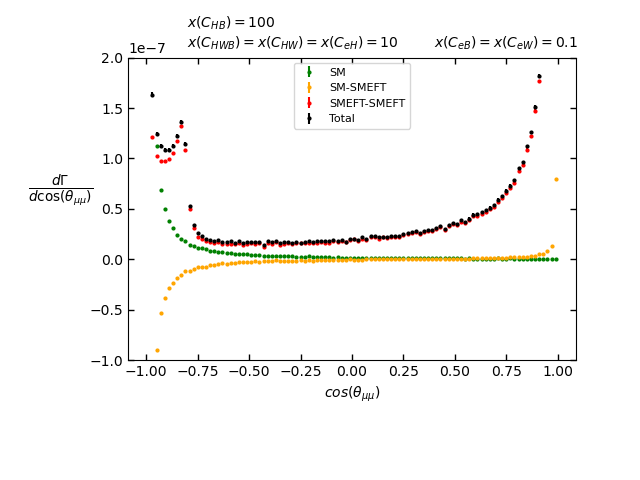

In [38]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.2, bottom=0.25)

num = 50

C_HBs = np.linspace(0, 100, num) * (m_m / (v * 10 ** 6))
C_HWs = np.linspace(0, 10, num) * (m_m / (v * 10 ** 6))
C_HWBs = C_HWs
C_eHs = C_HWs
C_eBs = np.ones(num) * 0.1 * (m_m / (v * 10 ** 6))
C_eWs = C_eBs
norm = 2 / bins
keV = 1
cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]
    
I_cos_alt4_1 = np.array(rick.load(open('I_cos_alt4_1mas_sep1', 'rb')))
I_cos_alt6_1 = np.array(rick.load(open('I_cos_alt6_1mas_sep1', 'rb')))
I_cos_alt6_2 = np.array(rick.load(open('I_cos_alt6_2mas_sep1', 'rb')))
I_cos_alt6_3 = np.array(rick.load(open('I_cos_alt6_3mas_sep1', 'rb')))
I_cos_alt6_4 = np.array(rick.load(open('I_cos_alt6_4mas_sep1', 'rb')))
I_cos_alt8_5 = np.array(rick.load(open('I_cos_alt8_5mas_sep1', 'rb')))
I_cos_alt8_6 = np.array(rick.load(open('I_cos_alt8_6mas_sep1', 'rb')))
I_cos_alt8_7 = np.array(rick.load(open('I_cos_alt8_7mas_sep1', 'rb')))
I_cos_alt8_8 = np.array(rick.load(open('I_cos_alt8_8mas_sep1', 'rb')))
I_cos_alt8_9 = np.array(rick.load(open('I_cos_alt8_9mas_sep1', 'rb')))
I_cos_alt8_10 = np.array(rick.load(open('I_cos_alt8_10mas_sep1', 'rb')))
mas_ls = [I_cos_alt4_1, I_cos_alt6_1, I_cos_alt6_2, I_cos_alt6_3, I_cos_alt6_4, I_cos_alt8_5, I_cos_alt8_6, I_cos_alt8_7, I_cos_alt8_8, I_cos_alt8_9, I_cos_alt8_10]

def cos_anim(l, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs):
    k = keV / norm
    return k * scale_anim(l, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)

def cos_alt_4sum_init(i):
    cos_4sum = 0
    cos_4errsum = 0
    for j in range(0, 1):
        cos_4sum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j]
        cos_4errsum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j + 1]
    return np.array([cos_4sum, cos_4errsum])

def cos_alt_6sum_init(i):
    cos_6sum = 0
    cos_6errsum = 0
    for j in range(1, 5):
        cos_6sum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j]
        cos_6errsum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j + 1]
    return np.array([cos_6sum, cos_6errsum])

def cos_alt_8sum_init(i):
    cos_8sum = 0
    cos_8errsum = 0
    for j in range(5, 11):
        cos_8sum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j]
        cos_8errsum += cos_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j + 1]
    return np.array([cos_8sum, cos_8errsum])

def animate(i):
    ax.clear()
    plt.ylim(-0.1*10**-6, 0.2*10**-6)
    #plt.yscale('log')
    ax.errorbar(cos_s, cos_alt_4sum_init(i)[0],  color = 'green', label = 'SM', yerr = cos_alt_4sum_init(i)[1], ls = 'none', markersize = 4, marker = '.')
    ax.errorbar(cos_s, cos_alt_6sum_init(i)[0],  color = 'orange', label = 'SM-SMEFT', yerr = cos_alt_6sum_init(i)[1], ls = 'none', markersize = 4, marker = '.')
    ax.errorbar(cos_s, cos_alt_8sum_init(i)[0],  color = 'red', label = 'SMEFT-SMEFT', yerr = cos_alt_8sum_init(i)[1], ls = 'none', markersize = 4, marker = '.')
    ax.tick_params(direction='in', length=4, width=1)
    ax.errorbar(cos_s, cos_alt_4sum_init(i)[0]+cos_alt_6sum_init(i)[0]+cos_alt_8sum_init(i)[0],  color = 'black', label = 'Total', yerr = cos_alt_4sum_init(i)[1]+cos_alt_6sum_init(i)[1]+cos_alt_8sum_init(i)[1], ls = 'none', markersize = 4, marker = '.')
    plt.ylabel(r'$\frac{d\Gamma}{d\cos(\theta_{\mu\mu})}$', rotation = '0', fontsize = 14)
    ax.text(-0.8, 0.21*10**-6, r'$x(C_{HWB})=x(C_{HW})=x(C_{eH})=$' +str(round(C_HWBs[i] * ((v * 10 ** 6) / m_m)))+'', fontsize = 10)
    ax.text(-0.8, 0.23*10**-6, r'$x(C_{HB})=$' +str(round(C_HBs[i] * ((v * 10 ** 6) / m_m)))+'', fontsize = 10)
    ax.text(0.4, 0.21*10**-6, r'$x(C_{eB})=x(C_{eW})=$' +str(round(C_eBs[i] * ((v * 10 ** 6) / m_m),2))+'', fontsize = 10)
    ax.yaxis.set_label_coords(-0.15, 0.5)
    plt.xlabel(r'$cos(\theta_{\mu\mu})$')
    plt.legend(loc='upper center', fontsize = 8)
    
anim = FuncAnimation(fig, animate, interval=200, frames=num, repeat=False)
anim.save('cos_ll.gif', writer='pillow')
plt.show()

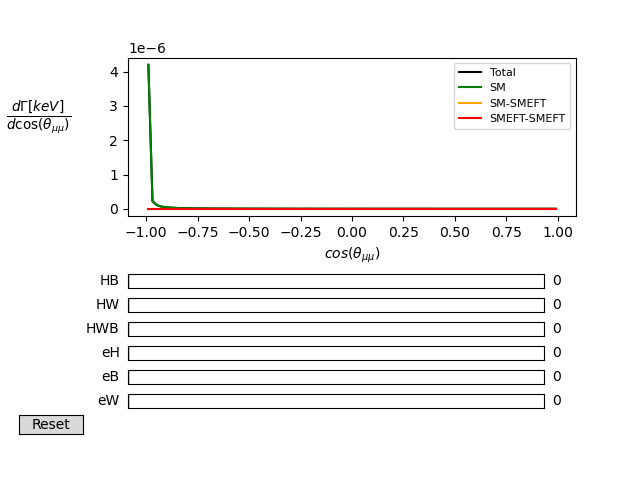

In [2]:
i_HB_init = 0 
i_HW_init = 0
i_HWB_init = 0
i_eH_init = 0
i_eB_init = 0 
i_eW_init = 0
norm = 2 / bins
keV = 1
k = keV / norm
cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]
    
I_cos_alt4_1 = np.array(rick.load(open('I_cos_alt4_1mas_sep1', 'rb')))
I_cos_alt6_1 = np.array(rick.load(open('I_cos_alt6_1mas_sep1', 'rb')))
I_cos_alt6_2 = np.array(rick.load(open('I_cos_alt6_2mas_sep1', 'rb')))
I_cos_alt6_3 = np.array(rick.load(open('I_cos_alt6_3mas_sep1', 'rb')))
I_cos_alt6_4 = np.array(rick.load(open('I_cos_alt6_4mas_sep1', 'rb')))
I_cos_alt8_5 = np.array(rick.load(open('I_cos_alt8_5mas_sep1', 'rb')))
I_cos_alt8_6 = np.array(rick.load(open('I_cos_alt8_6mas_sep1', 'rb')))
I_cos_alt8_7 = np.array(rick.load(open('I_cos_alt8_7mas_sep1', 'rb')))
I_cos_alt8_8 = np.array(rick.load(open('I_cos_alt8_8mas_sep1', 'rb')))
I_cos_alt8_9 = np.array(rick.load(open('I_cos_alt8_9mas_sep1', 'rb')))
I_cos_alt8_10 = np.array(rick.load(open('I_cos_alt8_10mas_sep1', 'rb')))
mas_ls = [I_cos_alt4_1, I_cos_alt6_1, I_cos_alt6_2, I_cos_alt6_3, I_cos_alt6_4, I_cos_alt8_5, I_cos_alt8_6, I_cos_alt8_7, I_cos_alt8_8, I_cos_alt8_9, I_cos_alt8_10]

def cos_alt_4sum_init(i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW):
    cos_4sum = 0
    cos_4errsum = 0
    for j in range(0, 1):
        cos_4sum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][0]
        cos_4errsum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][1]
    return k * np.array([cos_4sum, cos_4errsum])

def cos_alt_6sum_init(i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW):
    cos_6sum = 0
    cos_6errsum = 0
    for j in range(1, 5):
        cos_6sum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][0]
        cos_6errsum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][1]
    return k * np.array([cos_6sum, cos_6errsum])

def cos_alt_8sum_init(i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW):
    cos_8sum = 0
    cos_8errsum = 0
    for j in range(5, 11):
        cos_8sum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][0]
        cos_8errsum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][1]
    return k * np.array([cos_8sum, cos_8errsum])

fig, ax = plt.subplots()
#plt.ylim(-0.1, 1)
#plt.yscale('log')
line_sum, = ax.plot(cos_s, cos_alt_4sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0] + cos_alt_6sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0] + cos_alt_8sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0], color = 'black', label = 'Total')
line_4, = ax.plot(cos_s, cos_alt_4sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0], color = 'green', label = 'SM')
line_6, = ax.plot(cos_s, cos_alt_6sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0], color = 'orange', label = 'SM-SMEFT')
line_8, = ax.plot(cos_s, cos_alt_8sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0], color = 'red', label = 'SMEFT-SMEFT')
ax.set_ylabel(r'$\frac{d\Gamma[keV]}{d\cos(\theta_{\mu\mu})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.2, 0.5)
ax.set_xlabel(r'$cos(\theta_{\mu\mu})$')
plt.legend(fontsize = 8)

fig.subplots_adjust(left=0.2, bottom=0.55)

axs = fig.add_axes([0.2, 0.4, 0.65, 0.03])
HB_slider = Slider(
    ax=axs,
    label='HB',
    valmin=0,
    valmax=100,
    valinit=i_HB_init,
    color = 'gray')

axs = fig.add_axes([0.2, 0.35, 0.65, 0.03])
HW_slider = Slider(
    ax=axs,
    label='HW',
    valmin=0,
    valmax=100,
    valinit=i_HW_init,
    color = 'gray')

axs = fig.add_axes([0.2, 0.3, 0.65, 0.03])
HWB_slider = Slider(
    ax=axs,
    label='HWB',
    valmin=0,
    valmax=100,
    valinit=i_HWB_init,
    color = 'gray')

axs = fig.add_axes([0.2, 0.25, 0.65, 0.03])
eH_slider = Slider(
    ax=axs,
    label='eH',
    valmin=0,
    valmax=100,
    valinit=i_eH_init,
    color = 'gray')

axs = fig.add_axes([0.2, 0.2, 0.65, 0.03])
eB_slider = Slider(
    ax=axs,
    label='eB',
    valmin=0,
    valmax=100,
    valinit=i_eB_init,
    color = 'gray')

axs = fig.add_axes([0.2, 0.15, 0.65, 0.03])
eW_slider = Slider(
    ax=axs,
    label='eW',
    valmin=0,
    valmax=100,
    valinit=i_eW_init,
    color = 'gray')

def update(val):
    line_sum.set_ydata(cos_alt_4sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0] + cos_alt_6sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0] + cos_alt_8sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0])
    line_4.set_ydata(cos_alt_4sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0])
    line_6.set_ydata(cos_alt_6sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0])
    line_8.set_ydata(cos_alt_8sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0])
    fig.canvas.draw_idle()

HB_slider.on_changed(update)
HW_slider.on_changed(update)
HWB_slider.on_changed(update)
eH_slider.on_changed(update)
eB_slider.on_changed(update)
eW_slider.on_changed(update)

resetax = fig.add_axes([0.03, 0.095, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    HB_slider.reset()
    HW_slider.reset()
    HWB_slider.reset()
    eH_slider.reset()
    eB_slider.reset()
    eW_slider.reset()
button.on_clicked(reset)

plt.show()

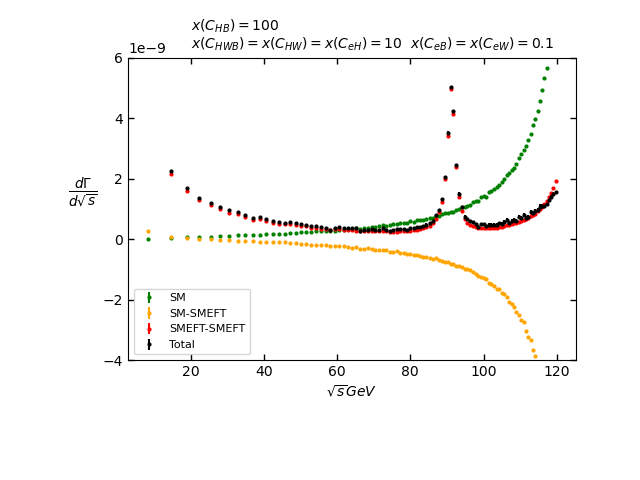

In [36]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.2, bottom=0.25)

num = 50

C_HBs = np.linspace(0, 100, num) * (m_m / (v * 10 ** 6))
C_HWs = np.linspace(0, 10, num) * (m_m / (v * 10 ** 6))
C_HWBs = C_HWs
C_eHs = C_HWs
C_eBs = np.ones(num) * 0.1 * (m_m / (v * 10 ** 6))
C_eWs = C_eBs

sqs = []
ss = []
for i in range(0, bins):
    ss += [s_min_fix + 0.5 * (s_max_fix - s_min_fix) / bins + i * (s_max_fix - s_min_fix) / bins]
    
sbins = []
for i in range(0, bins + 1):
    sbins += [i * (s_max_fix - s_min_fix) / bins]
    
sdbins = []
for i in range(0, bins):
    sdbins += [sbins[i + 1] ** 0.5 - sbins[i] ** 0.5]
    
sqs = np.array(ss) ** 0.5

I_4_1 = np.array(rick.load(open('I_4_1mas_sep1', 'rb')))
I_6_1 = np.array(rick.load(open('I_6_1mas_sep1', 'rb')))
I_6_2 = np.array(rick.load(open('I_6_2mas_sep1', 'rb')))
I_6_3 = np.array(rick.load(open('I_6_3mas_sep1', 'rb')))
I_6_4 = np.array(rick.load(open('I_6_4mas_sep1', 'rb')))
I_8_5 = np.array(rick.load(open('I_8_5mas_sep1', 'rb')))
I_8_6 = np.array(rick.load(open('I_8_6mas_sep1', 'rb')))
I_8_7 = np.array(rick.load(open('I_8_7mas_sep1', 'rb')))
I_8_8 = np.array(rick.load(open('I_8_8mas_sep1', 'rb')))
I_8_9 = np.array(rick.load(open('I_8_9mas_sep1', 'rb')))
I_8_10 = np.array(rick.load(open('I_8_10mas_sep1', 'rb')))
mas_ls = [I_4_1, I_6_1, I_6_2, I_6_3, I_6_4, I_8_5, I_8_6, I_8_7, I_8_8, I_8_9, I_8_10]

for i in range(0, len(mas_ls)):
    for k in range(0, 2):
        for j in range(0, bins):
            mas_ls[i][k][j] = mas_ls[i][k][j] / sdbins[j]

def s_anim(l, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs):
    return scale_anim(l, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)

def s_4sum_init(i):
    cos_4sum = 0
    cos_4errsum = 0
    for j in range(0, 1):
        cos_4sum += s_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j]
        cos_4errsum += s_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j + 1]
    return np.array([cos_4sum, cos_4errsum])

def s_6sum_init(i):
    cos_6sum = 0
    cos_6errsum = 0
    for j in range(1, 5):
        cos_6sum += s_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j]
        cos_6errsum += s_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j + 1]
    return np.array([cos_6sum, cos_6errsum])

def s_8sum_init(i):
    cos_8sum = 0
    cos_8errsum = 0
    for j in range(5, 11):
        cos_8sum += s_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j]
        cos_8errsum += s_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j + 1]
    return np.array([cos_8sum, cos_8errsum])

def animate(i):
    ax.clear()
    plt.ylim(-4 * 10**-9, 0.6 * 10**-8)
    #plt.axvline(x = s_max_fix**0.5, color = 'red', linestyle = '--')
    #plt.axvline(x = s_min_fix**0.5, color = 'red', linestyle = '--')
    #plt.axvline(x = m_Z, linestyle = '--', color = 'black')
    #plt.axvline(x = m_Z-2.5*Gam_Z**0.5, linestyle = '--', color = 'black')
    #plt.axvline(x = m_Z+2.5*Gam_Z**0.5, linestyle = '--', color = 'black')
    ax.tick_params(direction='in', length=4, width=1)
    ax.errorbar(sqs, s_4sum_init(i)[0],  color = 'green', label = 'SM', yerr = s_4sum_init(i)[1], ls = 'none', markersize = 4, marker = '.')
    ax.errorbar(sqs, s_6sum_init(i)[0],  color = 'orange', label = 'SM-SMEFT', yerr = s_6sum_init(i)[1], ls = 'none', markersize = 4, marker = '.')
    ax.errorbar(sqs, s_8sum_init(i)[0],  color = 'red', label = 'SMEFT-SMEFT', yerr = s_8sum_init(i)[1], ls = 'none', markersize = 4, marker = '.')
    ax.errorbar(sqs, s_4sum_init(i)[0]+s_6sum_init(i)[0]+s_8sum_init(i)[0],  color = 'black', label = 'Total', yerr = s_4sum_init(i)[1]+s_6sum_init(i)[1]+s_8sum_init(i)[1], ls = 'none', markersize = 4, marker = '.')
    plt.ylabel(r'$\frac{d\Gamma}{d\sqrt{s}}$', rotation = '0', fontsize = 14)
    ax.text(20, 6.3*10**-9, r'$x(C_{HWB})=x(C_{HW})=x(C_{eH})=$' +str(round(C_HWBs[i] * ((v * 10 ** 6) / m_m)))+'', fontsize = 10)
    ax.text(20, 6.9*10**-9, r'$x(C_{HB})=$' +str(round(C_HBs[i] * ((v * 10 ** 6) / m_m)))+'', fontsize = 10)
    ax.text(80, 6.3*10**-9, r'$x(C_{eB})=x(C_{eW})=$' +str(round(C_eBs[i] * ((v * 10 ** 6) / m_m),2))+'', fontsize = 10)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    plt.xlabel(r'$\sqrt{s} GeV$')
    plt.legend(loc='lower left', fontsize = 8)
    
anim = FuncAnimation(fig, animate, interval=200, frames=num, repeat=False)
anim.save('s.gif', writer='pillow')
plt.show()

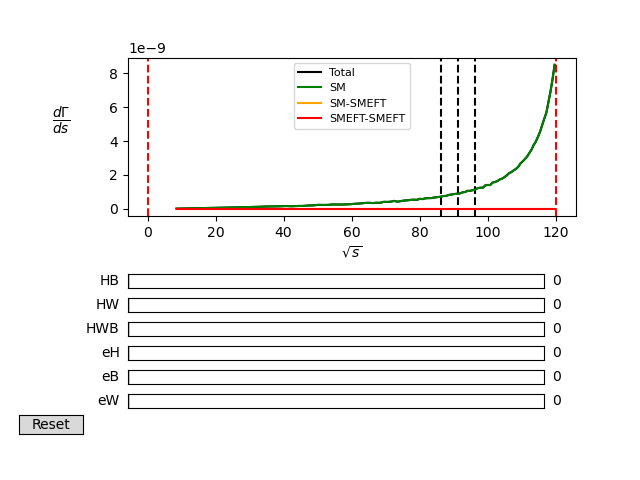

In [2]:
i_HB_init = 0 
i_HW_init = 0
i_HWB_init = 0
i_eH_init = 0
i_eB_init = 0 
i_eW_init = 0
sqs = []
ss = []
for i in range(0, bins):
    ss += [s_min_fix + 0.5 * (s_max_fix - s_min_fix) / bins + i * (s_max_fix - s_min_fix) / bins]
    
sbins = []
for i in range(0, bins + 1):
    sbins += [i * (s_max_fix - s_min_fix) / bins]
    
sdbins = []
for i in range(0, bins):
    sdbins += [sbins[i + 1] ** 0.5 - sbins[i] ** 0.5]
    
sqs = np.array(ss) ** 0.5

I_4_1 = np.array(rick.load(open('I_4_1mas_sep1', 'rb')))
I_6_1 = np.array(rick.load(open('I_6_1mas_sep1', 'rb')))
I_6_2 = np.array(rick.load(open('I_6_2mas_sep1', 'rb')))
I_6_3 = np.array(rick.load(open('I_6_3mas_sep1', 'rb')))
I_6_4 = np.array(rick.load(open('I_6_4mas_sep1', 'rb')))
I_8_5 = np.array(rick.load(open('I_8_5mas_sep1', 'rb')))
I_8_6 = np.array(rick.load(open('I_8_6mas_sep1', 'rb')))
I_8_7 = np.array(rick.load(open('I_8_7mas_sep1', 'rb')))
I_8_8 = np.array(rick.load(open('I_8_8mas_sep1', 'rb')))
I_8_9 = np.array(rick.load(open('I_8_9mas_sep1', 'rb')))
I_8_10 = np.array(rick.load(open('I_8_10mas_sep1', 'rb')))
mas_ls = [I_4_1, I_6_1, I_6_2, I_6_3, I_6_4, I_8_5, I_8_6, I_8_7, I_8_8, I_8_9, I_8_10]

for i in range(0, len(mas_ls)):
    for k in range(0, 2):
        for j in range(0, bins):
            mas_ls[i][k][j] = mas_ls[i][k][j] / sdbins[j]

def s_4sum_init(i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW):
    cos_4sum = 0
    cos_4errsum = 0
    for j in range(0, 1):
        cos_4sum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][0]
        cos_4errsum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][1]
    return np.array([cos_4sum, cos_4errsum])

def s_6sum_init(i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW):
    cos_6sum = 0
    cos_6errsum = 0
    for j in range(1, 5):
        cos_6sum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][0]
        cos_6errsum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][1]
    return np.array([cos_6sum, cos_6errsum])

def s_8sum_init(i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW):
    cos_8sum = 0
    cos_8errsum = 0
    for j in range(5, 11):
        cos_8sum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][0]
        cos_8errsum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][1]
    return np.array([cos_8sum, cos_8errsum])

fig, ax = plt.subplots()
#plt.ylim(-0.1*10**-8, 8*10**-9)
#plt.yscale('log')plt.axvline(x = t_max(s_max_fix, m)**0.5, color = 'red', linestyle = '--')
plt.axvline(x = s_max_fix**0.5, color = 'red', linestyle = '--')
plt.axvline(x = s_min_fix**0.5, color = 'red', linestyle = '--')
plt.axvline(x = m_Z, linestyle = '--', color = 'black')
plt.axvline(x = m_Z-5, linestyle = '--', color = 'black')
plt.axvline(x = m_Z+5, linestyle = '--', color = 'black')
line_sum, = ax.plot(sqs, s_4sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0] + s_6sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0] + s_8sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0], color = 'black', label = 'Total')
line_4, = ax.plot(sqs, s_4sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0], color = 'green', label = 'SM')
line_6, = ax.plot(sqs, s_6sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0], color = 'orange', label = 'SM-SMEFT')
line_8, = ax.plot(sqs, s_8sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0], color = 'red', label = 'SMEFT-SMEFT')
ax.set_ylabel(r'$\frac{d\Gamma}{ds}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
ax.set_xlabel(r'$\sqrt{s}$')
plt.legend(fontsize = 8)

fig.subplots_adjust(left=0.2, bottom=0.55)

axs = fig.add_axes([0.2, 0.4, 0.65, 0.03])
HB_slider = Slider(
    ax=axs,
    label='HB',
    valmin=0,
    valmax=100,
    valinit=i_HB_init,
    color = 'gray')

axs = fig.add_axes([0.2, 0.35, 0.65, 0.03])
HW_slider = Slider(
    ax=axs,
    label='HW',
    valmin=0,
    valmax=100,
    valinit=i_HW_init,
    color = 'gray')

axs = fig.add_axes([0.2, 0.3, 0.65, 0.03])
HWB_slider = Slider(
    ax=axs,
    label='HWB',
    valmin=0,
    valmax=100,
    valinit=i_HWB_init,
    color = 'gray')

axs = fig.add_axes([0.2, 0.25, 0.65, 0.03])
eH_slider = Slider(
    ax=axs,
    label='eH',
    valmin=0,
    valmax=100,
    valinit=i_eH_init,
    color = 'gray')

axs = fig.add_axes([0.2, 0.2, 0.65, 0.03])
eB_slider = Slider(
    ax=axs,
    label='eB',
    valmin=0,
    valmax=100,
    valinit=i_eB_init,
    color = 'gray')

axs = fig.add_axes([0.2, 0.15, 0.65, 0.03])
eW_slider = Slider(
    ax=axs,
    label='eW',
    valmin=0,
    valmax=100,
    valinit=i_eW_init,
    color = 'gray')

def update(val):
    line_sum.set_ydata(s_4sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0] + s_6sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0] + s_8sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0])
    line_4.set_ydata(s_4sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0])
    line_6.set_ydata(s_6sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0])
    line_8.set_ydata(s_8sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0])
    fig.canvas.draw_idle()

HB_slider.on_changed(update)
HW_slider.on_changed(update)
HWB_slider.on_changed(update)
eH_slider.on_changed(update)
eB_slider.on_changed(update)
eW_slider.on_changed(update)

resetax = fig.add_axes([0.03, 0.095, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    HB_slider.reset()
    HW_slider.reset()
    HWB_slider.reset()
    eH_slider.reset()
    eB_slider.reset()
    eW_slider.reset()
button.on_clicked(reset)

plt.show()

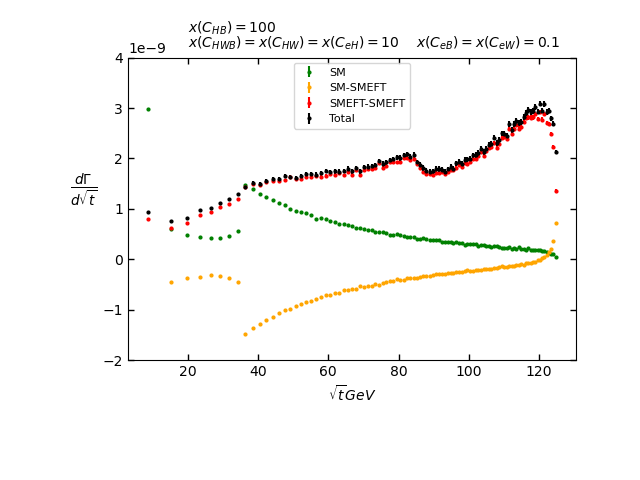

In [37]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=0.2, bottom=0.25)

num = 50

C_HBs = np.linspace(0, 100, num) * (m_m / (v * 10 ** 6))
C_HWs = np.linspace(0, 10, num) * (m_m / (v * 10 ** 6))
C_HWBs = C_HWs
C_eHs = C_HWs
C_eBs = np.ones(num) * 0.1 * (m_m / (v * 10 ** 6))
C_eWs = C_eBs

sqt = []
ts = []
for i in range(0, bins):
    ts += [t_min_fix + 0.5 * (t_max_fix - t_min_fix) / bins + i * (t_max_fix - t_min_fix) / bins]
    
tbins = []
for i in range(0, bins + 1):
    tbins += [i * (t_max_fix - t_min_fix) / bins]
    
tdbins = []
for i in range(0, bins):
    tdbins += [tbins[i + 1] ** 0.5 - tbins[i] ** 0.5]
    
sqt = np.array(ts) ** 0.5

I_4_1t = np.array(rick.load(open('I_4_1tmas_sep1', 'rb')))
I_6_1t = np.array(rick.load(open('I_6_1tmas_sep1', 'rb')))
I_6_2t = np.array(rick.load(open('I_6_2tmas_sep1', 'rb')))
I_6_3t = np.array(rick.load(open('I_6_3tmas_sep1', 'rb')))
I_6_4t = np.array(rick.load(open('I_6_4tmas_sep1', 'rb')))
I_8_5t = np.array(rick.load(open('I_8_5tmas_sep1', 'rb')))
I_8_6t = np.array(rick.load(open('I_8_6tmas_sep1', 'rb')))
I_8_7t = np.array(rick.load(open('I_8_7tmas_sep1', 'rb')))
I_8_8t = np.array(rick.load(open('I_8_8tmas_sep1', 'rb')))
I_8_9t = np.array(rick.load(open('I_8_9tmas_sep1', 'rb')))
I_8_10t = np.array(rick.load(open('I_8_10tmas_sep1', 'rb')))
mas_ls = [I_4_1t, I_6_1t, I_6_2t, I_6_3t, I_6_4t, I_8_5t, I_8_6t, I_8_7t, I_8_8t, I_8_9t, I_8_10t]

for i in range(0, len(mas_ls)):
    for k in range(0, 2):
        for j in range(0, bins):
            mas_ls[i][k][j] = mas_ls[i][k][j] / tdbins[j]

def t_anim(l, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs):
    return scale_anim(l, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)

def t_4sum_init(i):
    cos_4sum = 0
    cos_4errsum = 0
    for j in range(0, 1):
        cos_4sum += s_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j]
        cos_4errsum += s_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j + 1]
    return np.array([cos_4sum, cos_4errsum])

def t_6sum_init(i):
    cos_6sum = 0
    cos_6errsum = 0
    for j in range(1, 5):
        cos_6sum += s_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j]
        cos_6errsum += s_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j + 1]
    return np.array([cos_6sum, cos_6errsum])

def t_8sum_init(i):
    cos_8sum = 0
    cos_8errsum = 0
    for j in range(5, 11):
        cos_8sum += s_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j]
        cos_8errsum += s_anim(mas_ls, C_HBs, C_HWs, C_HWBs, C_eHs, C_eBs, C_eWs)[i, 2*j + 1]
    return np.array([cos_8sum, cos_8errsum])

def animate(i):
    ax.clear()
    plt.ylim(-2 * 10**-9, 4 * 10**-9)
    #plt.yscale('log')
    #plt.axvline(x = t_max(s_max_fix, m)**0.5, color = 'red', linestyle = '--')
    #plt.axvline(x = t_min(s_max_fix, m)**0.5, color = 'red', linestyle = '--')
    #plt.axvline(x = m_Z, linestyle = '--', color = 'black')
    #plt.axvline(x = m_Z-2.5*Gam_Z**0.5, linestyle = '--', color = 'black')
    #plt.axvline(x = m_Z+2.5*Gam_Z**0.5, linestyle = '--', color = 'black')
    ax.tick_params(direction='in', length=4, width=1)
    ax.errorbar(sqt, t_4sum_init(i)[0],  color = 'green', label = 'SM', yerr = t_4sum_init(i)[1], ls = 'none', markersize = 4, marker = '.')
    ax.errorbar(sqt, t_6sum_init(i)[0],  color = 'orange', label = 'SM-SMEFT', yerr = t_6sum_init(i)[1], ls = 'none', markersize = 4, marker = '.')
    ax.errorbar(sqt, t_8sum_init(i)[0],  color = 'red', label = 'SMEFT-SMEFT', yerr = t_8sum_init(i)[1], ls = 'none', markersize = 4, marker = '.')
    ax.errorbar(sqt, t_4sum_init(i)[0]+t_6sum_init(i)[0]+t_8sum_init(i)[0],  color = 'black', label = 'Total', yerr = t_4sum_init(i)[1]+t_6sum_init(i)[1]+t_8sum_init(i)[1], ls = 'none', markersize = 4, marker = '.')
    plt.ylabel(r'$\frac{d\Gamma}{d\sqrt{t}}$', rotation = '0', fontsize = 14)
    ax.text(20, 4.2*10**-9, r'$x(C_{HWB})=x(C_{HW})=x(C_{eH})=$' +str(round(C_HWBs[i] * ((v * 10 ** 6) / m_m)))+'', fontsize = 10)
    ax.text(20, 4.5*10**-9, r'$x(C_{HB})=$' +str(round(C_HBs[i] * ((v * 10 ** 6) / m_m)))+'', fontsize = 10)
    ax.text(85, 4.2*10**-9, r'$x(C_{eB})=x(C_{eW})=$' +str(round(C_eBs[i] * ((v * 10 ** 6) / m_m),2))+'', fontsize = 10)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    plt.xlabel(r'$\sqrt{t} GeV$')
    plt.legend(loc='upper center', fontsize = 8)
    
anim = FuncAnimation(fig, animate, interval=200, frames=num, repeat=False)
anim.save('t.gif', writer='pillow')
plt.show()

In [47]:
tdbins[0]

12.499429146187824

In [51]:
sqt[0]

8.839117516410399

In [54]:
ts[0]

78.12999846891314

In [58]:
ts[0]-(tbins[1]-tbins[0])/2

0.012133978628298792

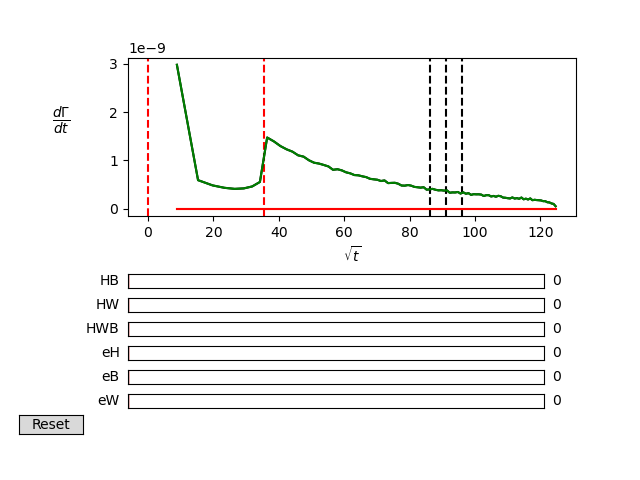

In [7]:
i_HB_init = 0 
i_HW_init = 0
i_HWB_init = 0
i_eH_init = 0
i_eB_init = 0 
i_eW_init = 0
sqt = []
ts = []
for i in range(0, bins):
    ts += [t_min_fix + 0.5 * (t_max_fix - t_min_fix) / bins + i * (t_max_fix - t_min_fix) / bins]
    
tbins = []
for i in range(0, bins + 1):
    tbins += [i * (t_max_fix - t_min_fix) / bins]
    
tdbins = []
for i in range(0, bins):
    tdbins += [tbins[i + 1] ** 0.5 - tbins[i] ** 0.5]
    
sqt = np.array(ts) ** 0.5

I_4_1t = np.array(rick.load(open('I_4_1tmas_sep1', 'rb')))
I_6_1t = np.array(rick.load(open('I_6_1tmas_sep1', 'rb')))
I_6_2t = np.array(rick.load(open('I_6_2tmas_sep1', 'rb')))
I_6_3t = np.array(rick.load(open('I_6_3tmas_sep1', 'rb')))
I_6_4t = np.array(rick.load(open('I_6_4tmas_sep1', 'rb')))
I_8_5t = np.array(rick.load(open('I_8_5tmas_sep1', 'rb')))
I_8_6t = np.array(rick.load(open('I_8_6tmas_sep1', 'rb')))
I_8_7t = np.array(rick.load(open('I_8_7tmas_sep1', 'rb')))
I_8_8t = np.array(rick.load(open('I_8_8tmas_sep1', 'rb')))
I_8_9t = np.array(rick.load(open('I_8_9tmas_sep1', 'rb')))
I_8_10t = np.array(rick.load(open('I_8_10tmas_sep1', 'rb')))
mas_ls = [I_4_1t, I_6_1t, I_6_2t, I_6_3t, I_6_4t, I_8_5t, I_8_6t, I_8_7t, I_8_8t, I_8_9t, I_8_10t]

for i in range(0, len(mas_ls)):
    for k in range(0, 2):
        for j in range(0, bins):
            mas_ls[i][k][j] = mas_ls[i][k][j] / tdbins[j]

def t_4sum_init(i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW):
    cos_4sum = 0
    cos_4errsum = 0
    for j in range(0, 1):
        cos_4sum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][0]
        cos_4errsum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][1]
    return np.array([cos_4sum, cos_4errsum])

def t_6sum_init(i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW):
    cos_6sum = 0
    cos_6errsum = 0
    for j in range(1, 5):
        cos_6sum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][0]
        cos_6errsum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][1]
    return np.array([cos_6sum, cos_6errsum])

def t_8sum_init(i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW):
    cos_8sum = 0
    cos_8errsum = 0
    for j in range(5, 11):
        cos_8sum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][0]
        cos_8errsum += scale(mas_ls, i_HB, i_HW, i_HWB, i_eH, i_eB, i_eW)[j][1]
    return np.array([cos_8sum, cos_8errsum])

fig, ax = plt.subplots()
#plt.ylim(-0.1, 1)
#plt.yscale('log')
plt.axvline(x = t_max(s_max_fix, m)**0.5, color = 'red', linestyle = '--')
plt.axvline(x = t_min(s_max_fix, m)**0.5, color = 'red', linestyle = '--')
plt.axvline(x = m_Z, linestyle = '--', color = 'black')
plt.axvline(x = m_Z-5, linestyle = '--', color = 'black')
plt.axvline(x = m_Z+5, linestyle = '--', color = 'black')
line_sum, = ax.plot(sqt, t_4sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0] + t_6sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0] + t_8sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0], color = 'black', label = 'Total')
line_4, = ax.plot(sqt, t_4sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0], color = 'green', label = 'SM')
line_6, = ax.plot(sqt, t_6sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0], color = 'orange', label = 'SM-SMEFT')
line_8, = ax.plot(sqt, t_8sum_init(i_HB_init, i_HW_init, i_HWB_init, i_eH_init, i_eB_init, i_eW_init)[0], color = 'red', label = 'SMEFT-SMEFT')
ax.set_ylabel(r'$\frac{d\Gamma}{dt}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
ax.set_xlabel(r'$\sqrt{t}$')
plt.legend(fontsize = 8)

fig.subplots_adjust(left=0.2, bottom=0.55)

axs = fig.add_axes([0.2, 0.4, 0.65, 0.03])
HB_slider = Slider(
    ax=axs,
    label='HB',
    valmin=0,
    valmax=100,
    valinit=i_HB_init,
    color = 'gray')

axs = fig.add_axes([0.2, 0.35, 0.65, 0.03])
HW_slider = Slider(
    ax=axs,
    label='HW',
    valmin=0,
    valmax=100,
    valinit=i_HW_init,
    color = 'gray')

axs = fig.add_axes([0.2, 0.3, 0.65, 0.03])
HWB_slider = Slider(
    ax=axs,
    label='HWB',
    valmin=0,
    valmax=100,
    valinit=i_HWB_init,
    color = 'gray')

axs = fig.add_axes([0.2, 0.25, 0.65, 0.03])
eH_slider = Slider(
    ax=axs,
    label='eH',
    valmin=0,
    valmax=100,
    valinit=i_eH_init,
    color = 'gray')

axs = fig.add_axes([0.2, 0.2, 0.65, 0.03])
eB_slider = Slider(
    ax=axs,
    label='eB',
    valmin=0,
    valmax=100,
    valinit=i_eB_init,
    color = 'gray')

axs = fig.add_axes([0.2, 0.15, 0.65, 0.03])
eW_slider = Slider(
    ax=axs,
    label='eW',
    valmin=0,
    valmax=100,
    valinit=i_eW_init,
    color = 'gray')

def update(val):
    line_sum.set_ydata(t_4sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0] + t_6sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0] + t_8sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0])
    line_4.set_ydata(t_4sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0])
    line_6.set_ydata(t_6sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0])
    line_8.set_ydata(t_8sum_init(HB_slider.val, HW_slider.val, HWB_slider.val, eH_slider.val, eB_slider.val, eW_slider.val)[0])
    fig.canvas.draw_idle()

HB_slider.on_changed(update)
HW_slider.on_changed(update)
HWB_slider.on_changed(update)
eH_slider.on_changed(update)
eB_slider.on_changed(update)
eW_slider.on_changed(update)

resetax = fig.add_axes([0.03, 0.095, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    HB_slider.reset()
    HW_slider.reset()
    HWB_slider.reset()
    eH_slider.reset()
    eB_slider.reset()
    eW_slider.reset()
button.on_clicked(reset)

plt.show()